In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
'''Imblearn library is specifically designed to deal with imbalanced datasets. It provides various methods like undersampling, 
oversampling, and SMOTE to handle and removing the imbalance from the dataset.'''

'Imblearn library is specifically designed to deal with imbalanced datasets. It provides various methods like undersampling, \noversampling, and SMOTE to handle and removing the imbalance from the dataset.'

In [3]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [4]:
# analysis
import pandas as pd
import numpy as np
from scipy import stats

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# preprocessingn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# metrics
from sklearn.metrics import roc_auc_score
'''Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.'''

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import OrdinalEncoder



import warnings
import path

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:\\Users\\Jigya Taneja\\Documents\\Sem 6\\Capstone Project\\Phase 2\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
'''Over18-Since the minimum age of Employees is 18 there is no need to include the column over 18.
StandardHours-Since the number of hours each employee works in a week is same for all i.e. 80 we have removed this column as well.
EmployeeCount-Since the value is same for all the employees we have removed this as well.'''


'Over18-Since the minimum age of Employees is 18 there is no need to include the column over 18.\nStandardHours-Since the number of hours each employee works in a week is same for all i.e. 80 we have removed this column as well.\nEmployeeCount-Since the value is same for all the employees we have removed this as well.'

In [11]:
df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount'], inplace=True)

In [12]:
df.drop(columns=['EmployeeNumber'], inplace=True)

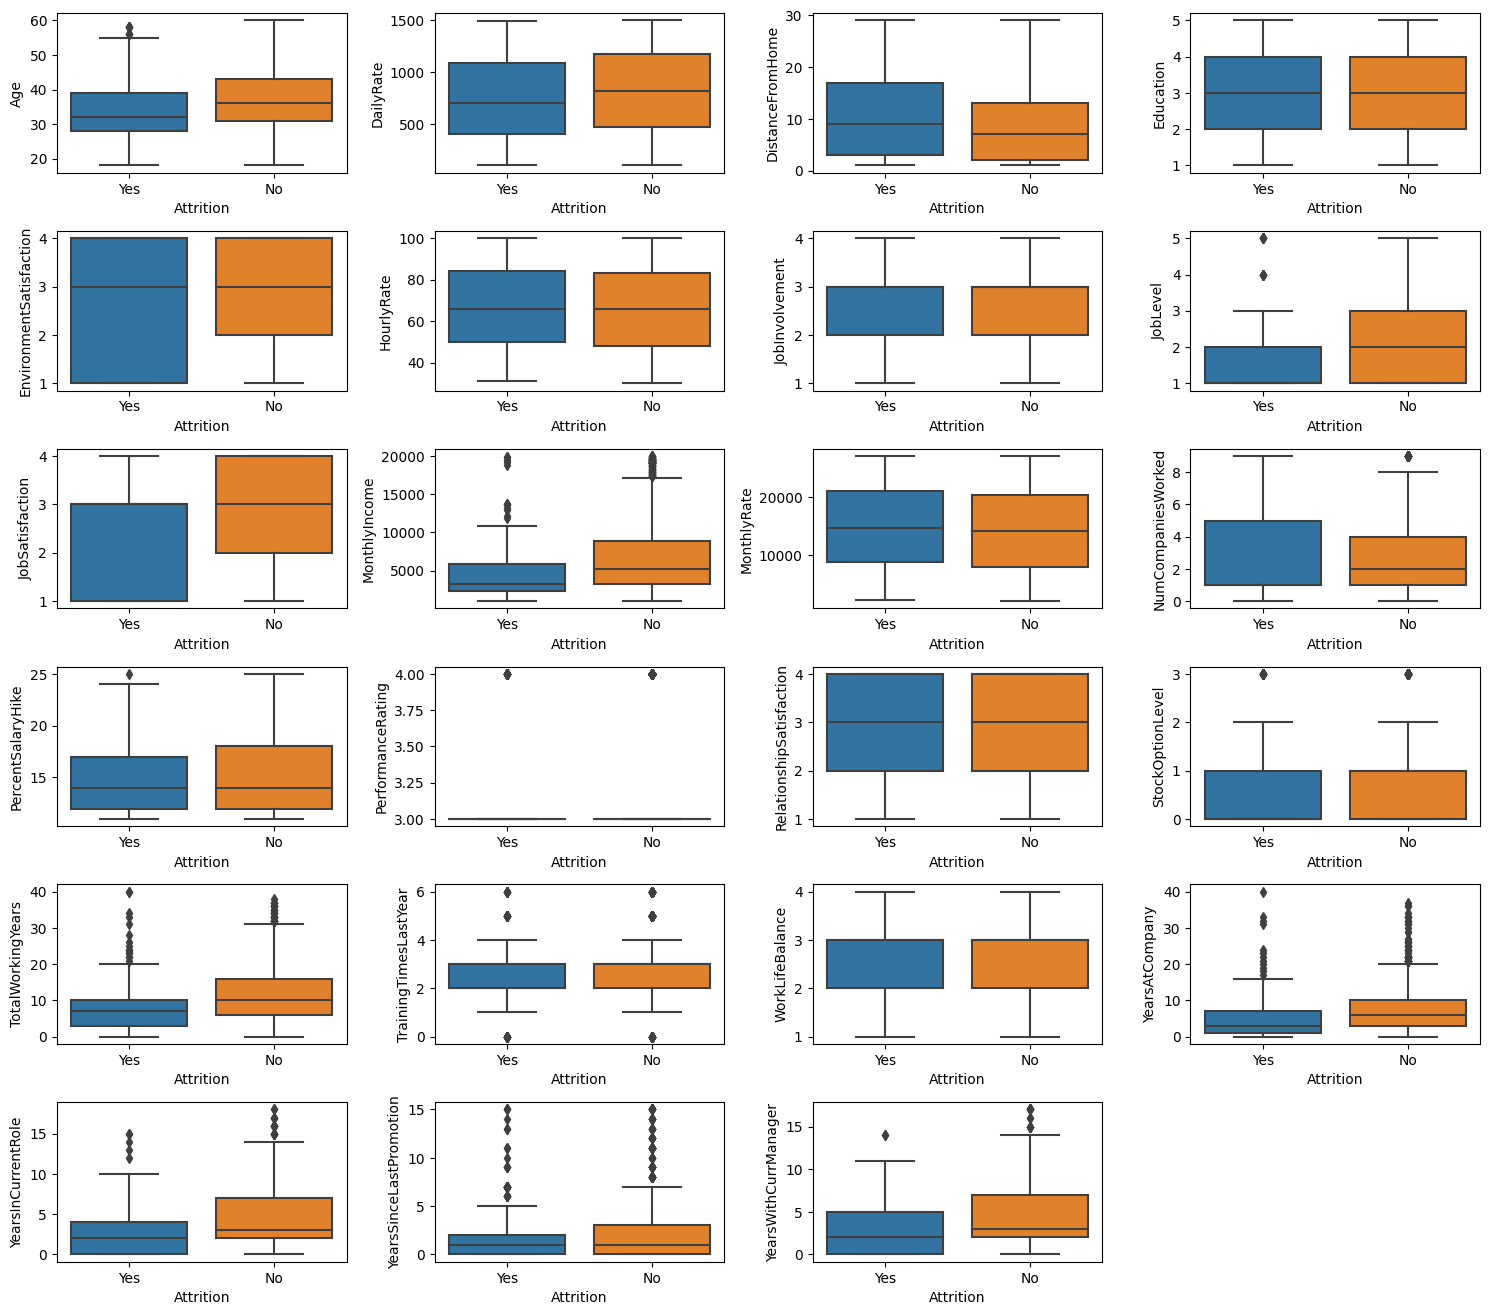

In [13]:
#Removing any possible outliers
# Box Plots
quan_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, 15))
for index, col in enumerate(quan_cols):
    plt.subplot(7, 4, index+1)
    sns.boxplot(data=df, x='Attrition', y=col)
    

plt.tight_layout()

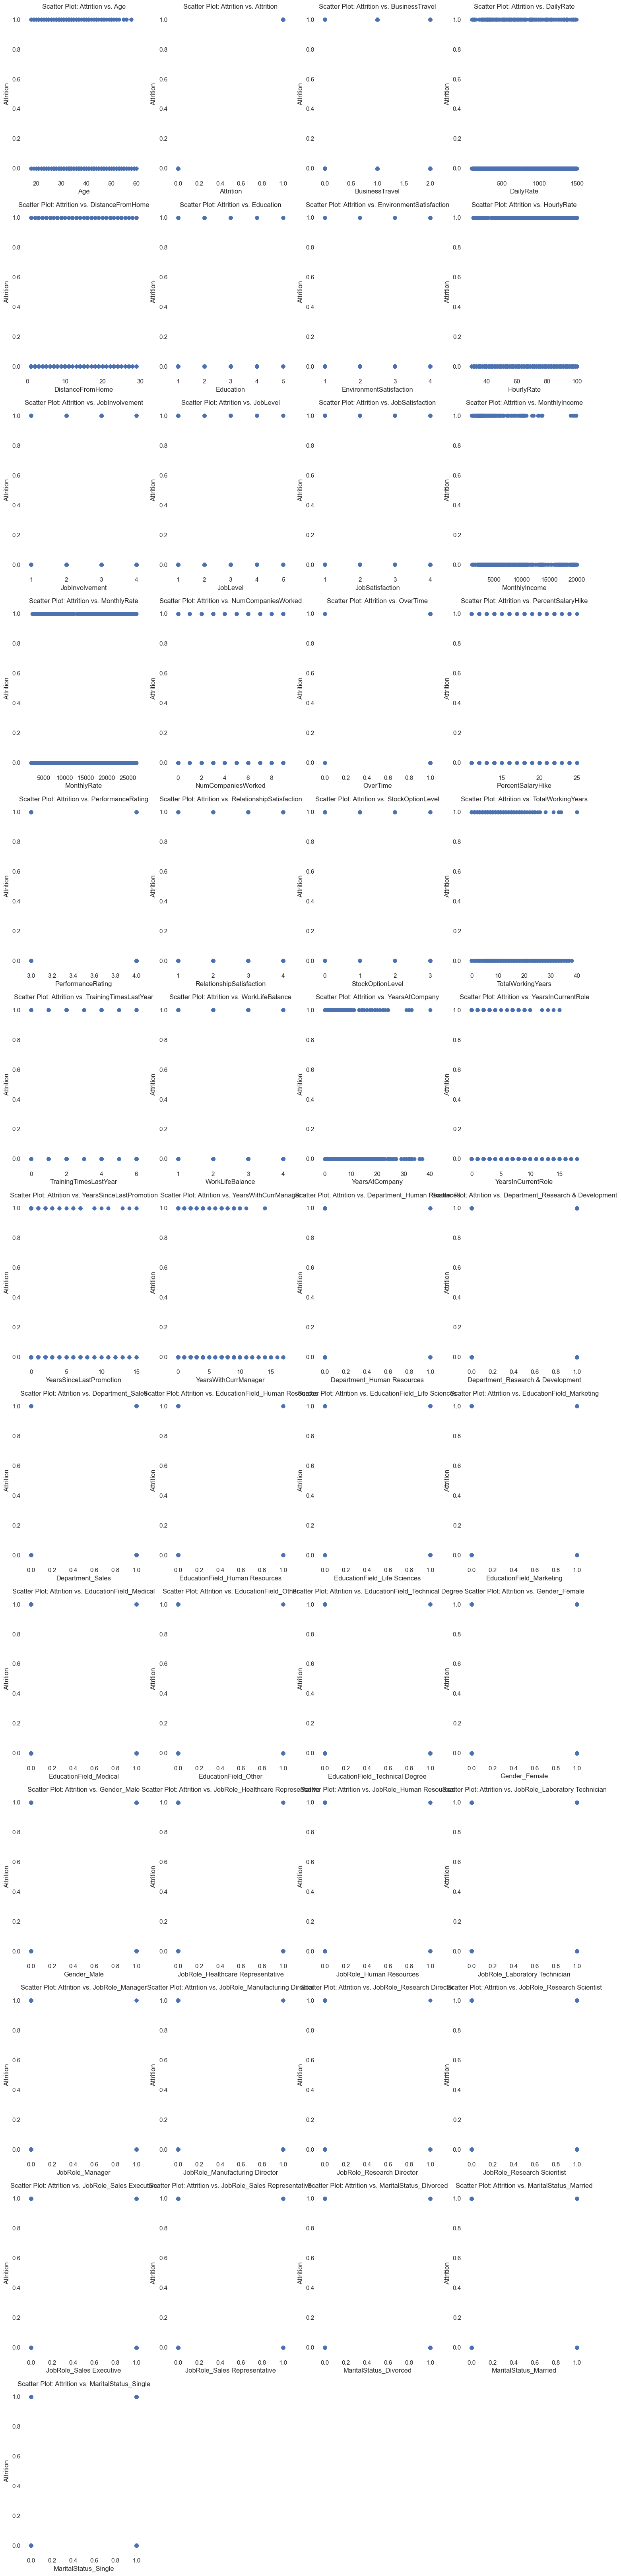

In [115]:
# Scatter Plots
quan_cols = df.select_dtypes(include=['int', 'float']).columns
num_cols = len(quan_cols)
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for index, col in enumerate(quan_cols):
    plt.subplot(num_rows, 4, index + 1)  # Use num_rows instead of 7, and 4 columns
    plt.scatter(df[col],df['Attrition'])
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.title(f'Scatter Plot: Attrition vs. {col}')

plt.tight_layout()
plt.show()

In [14]:
'''From the box plot we can gain valuable insights into the data like for example for
the attribute age mostly younger people have left the organization , and also people who are 
above 50'''

'From the box plot we can gain valuable insights into the data like for example for\nthe attribute age mostly younger people have left the organization , and also people who are \nabove 50'

In [15]:
target = 'Attrition'

In [16]:
(df[target].value_counts() / len(df)).round(2)

Attrition
No     0.84
Yes    0.16
Name: count, dtype: float64

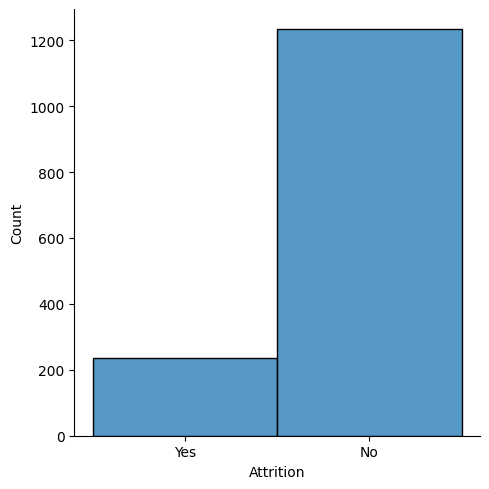

In [17]:
sns.displot(data=df, x=target)

In [18]:
#The dataset is unbalanced,only 16% value of the target attribute attrition is yes , rest is no.

In [19]:
# separate categorical and numerical data
features = df.drop(target, axis=1).columns.to_list()
numerical_feat = [col for col in df.select_dtypes('int64').columns if col in features]
categorical_feat = [col for col in df.select_dtypes('object').columns if col in features]

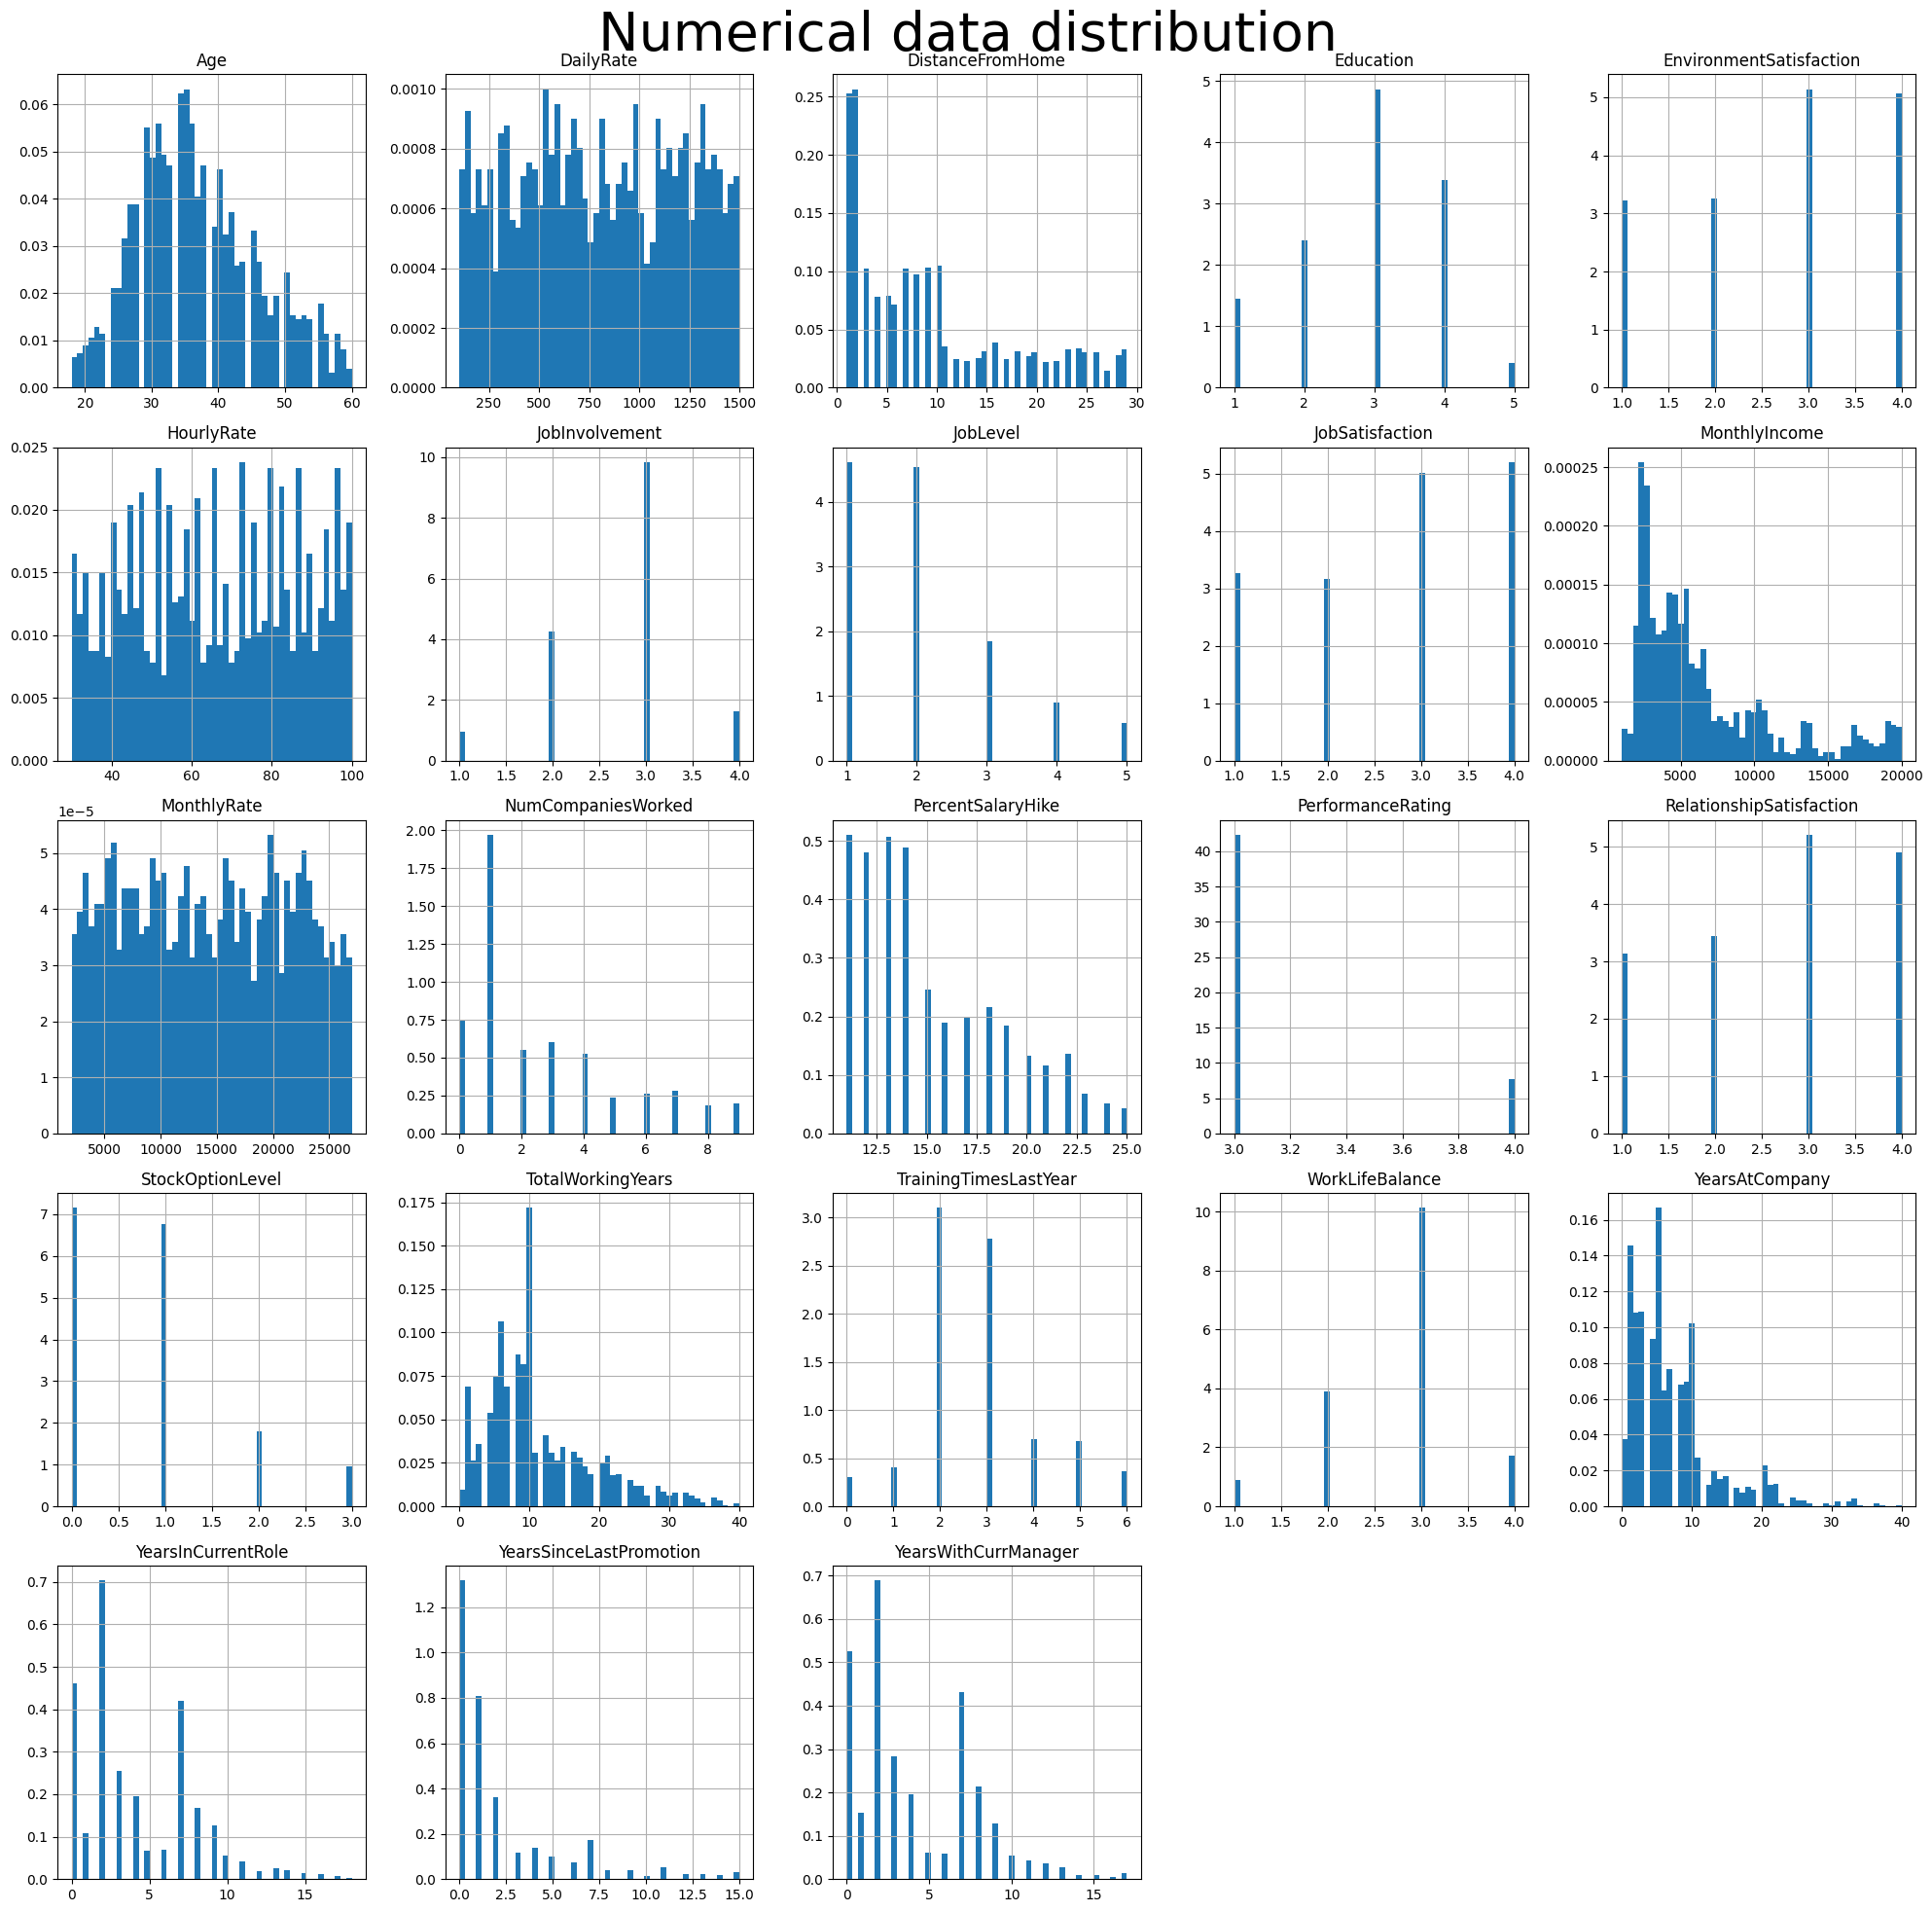

In [20]:
df[numerical_feat].hist(figsize=(20, 20), density=True, bins=50)
plt.suptitle('Numerical data distribution', fontsize=40)
plt.tight_layout()
plt.show()

In [21]:
'''Most of the employees are in the age group of 30-40.
Most of them live near the workplace so that they don't have to spend hours daily to reach work destination.
MonthlyIncome's distribution is right-skewed.'''

"Most of the employees are in the age group of 30-40.\nMost of them live near the workplace so that they don't have to spend hours daily to reach work destination.\nMonthlyIncome's distribution is right-skewed."

In [22]:
# Categorical data vs the target

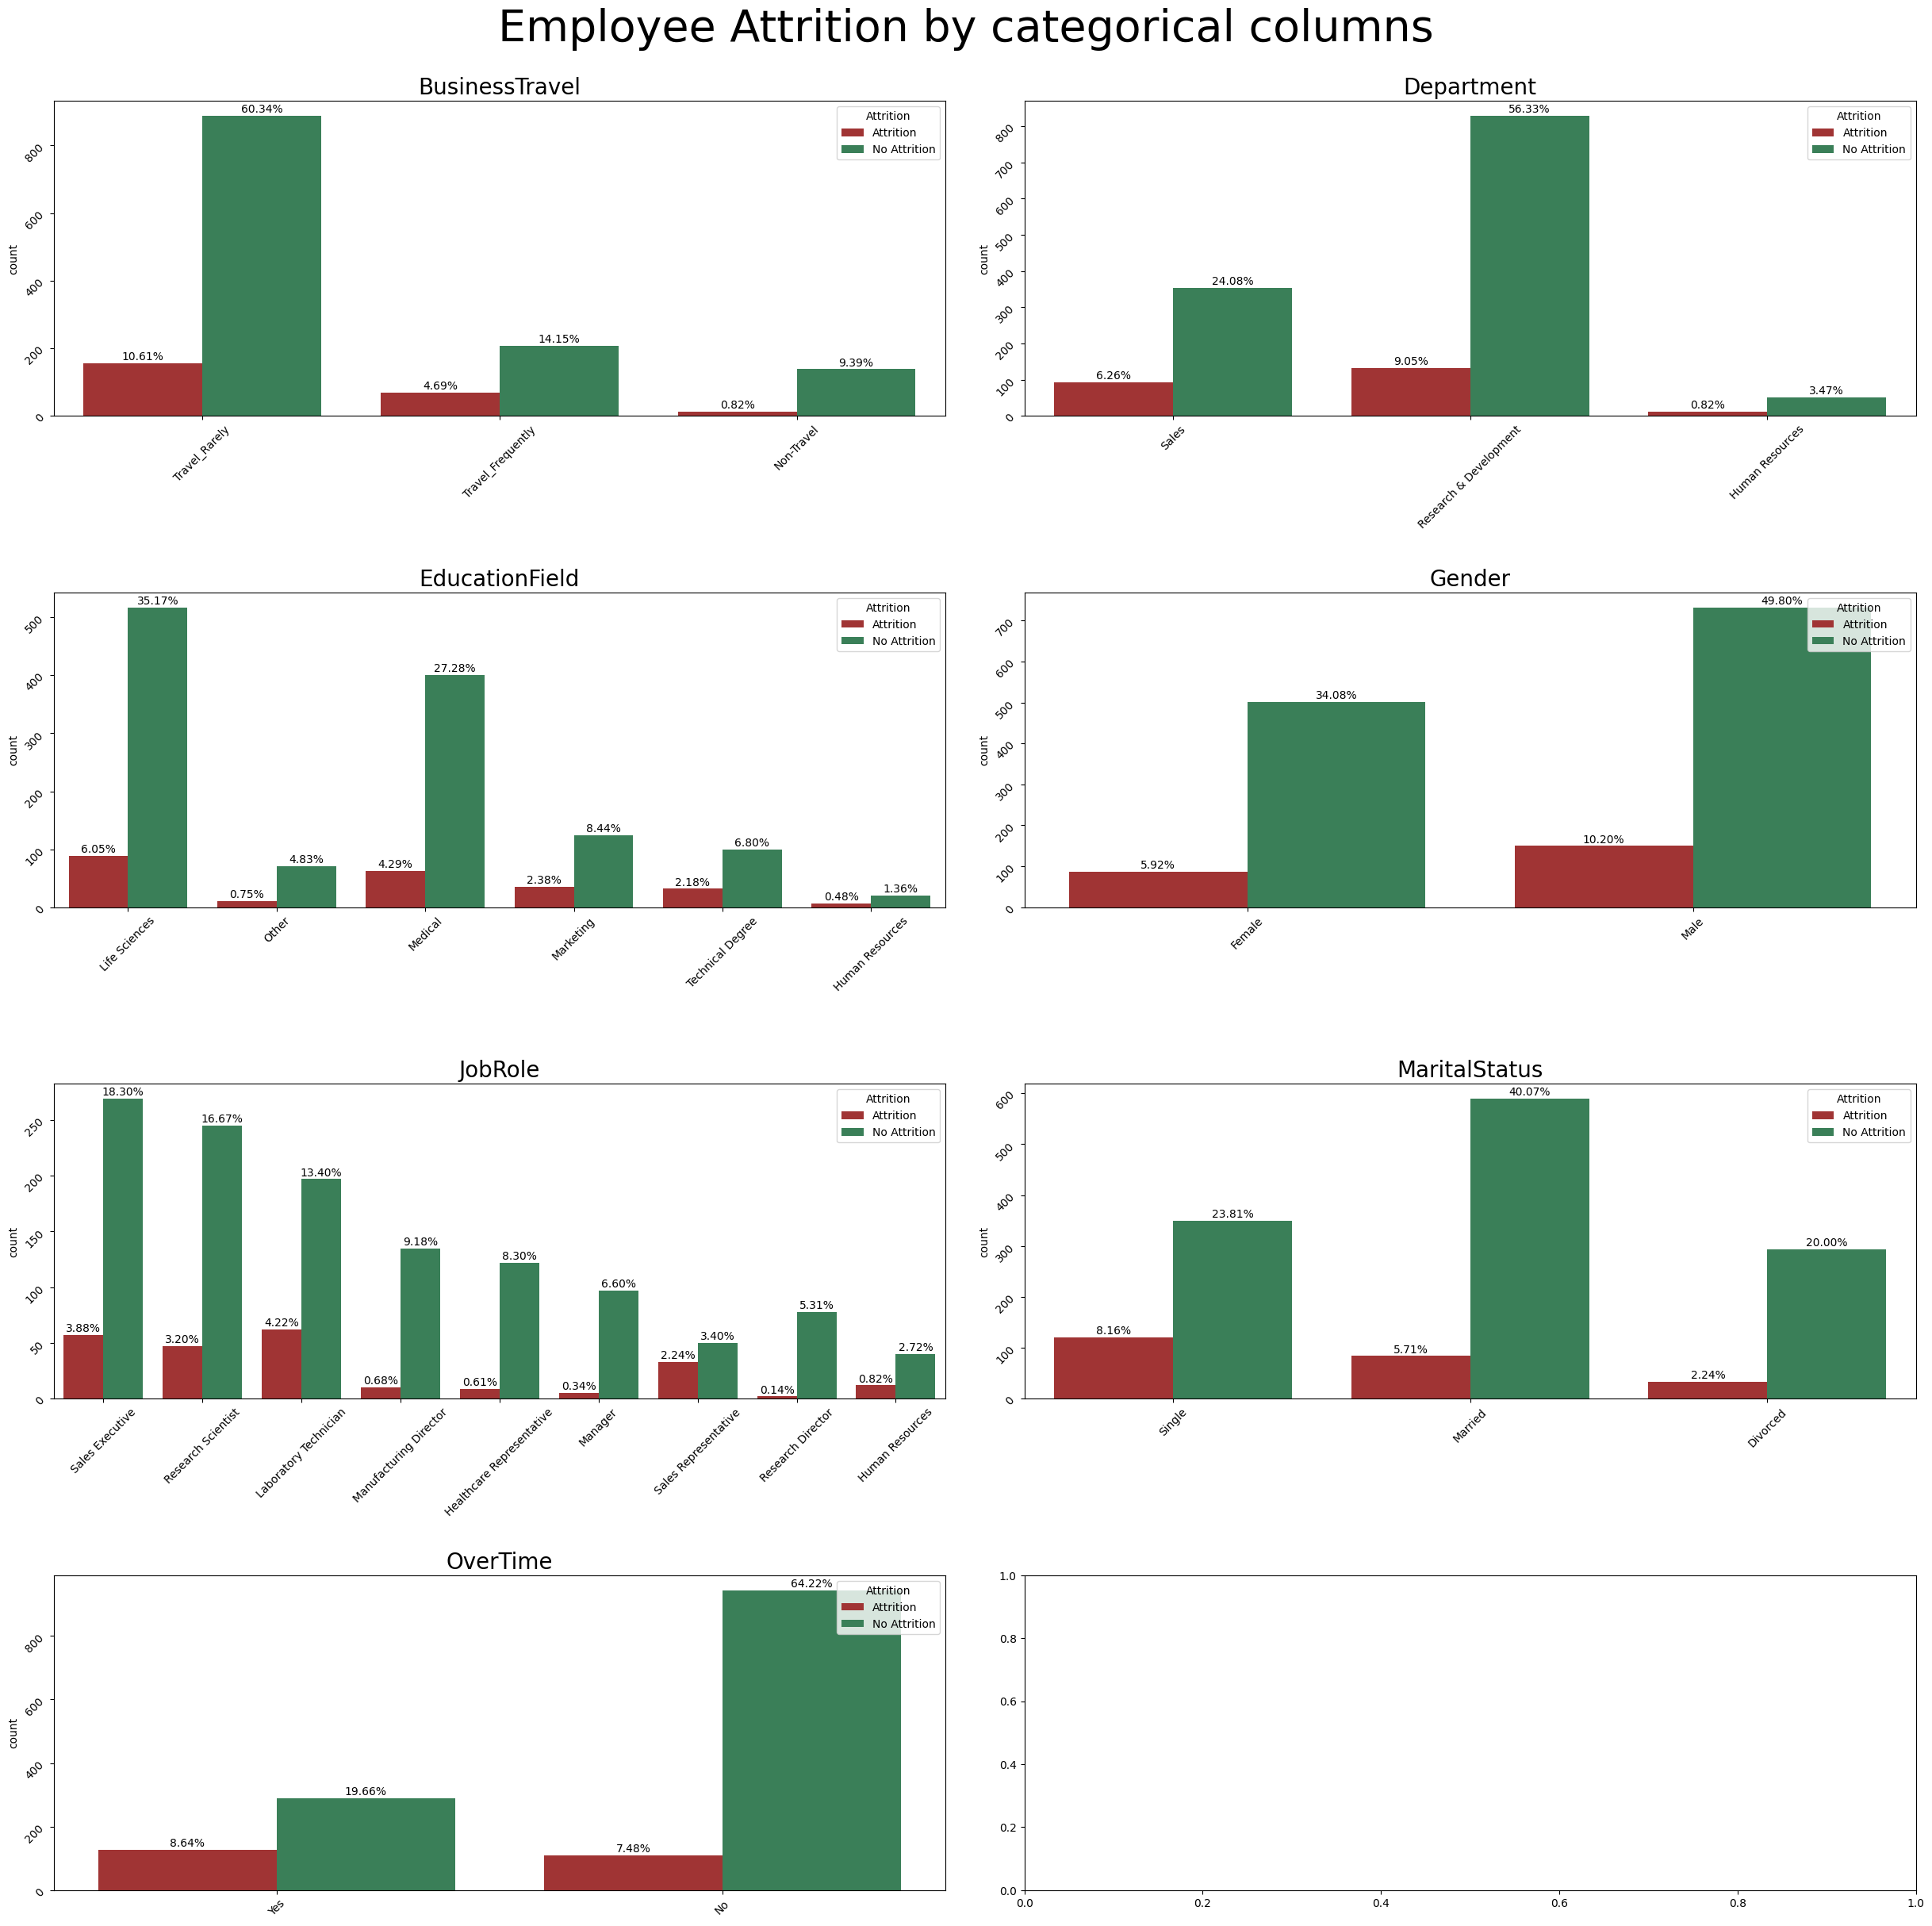

In [23]:
my_palette = {'Yes': 'firebrick', 'No': 'seagreen'}
fig , ax = plt.subplots(4,2,figsize=(25,25))
total = len(df)
ax =  np.ravel(ax)

for i, col in enumerate(categorical_feat):
    sns.countplot(ax=ax[i], x=df[col], hue=df['Attrition'], palette=my_palette)
    ax[i].tick_params(labelrotation=45)
    ax[i].set_title(f"{col}",fontsize=20)
    ax[i].legend(title='Attrition', loc='upper right', labels=['Attrition', 'No Attrition'])
    ax[i].set(xlabel=None)
  
    for p in ax[i].patches:
        percentage = f'{100*p.get_height()/total:.2f}%\n'
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax[i].annotate(percentage, (x,y), ha='center', va='center')


fig.suptitle("Employee Attrition by categorical columns",fontsize = 40)
fig.tight_layout(pad = 3)
plt.show()

In [24]:
'''Employees who travelled rarely are more likely to leave the company than employees who travelled frequently or hadn't travel at all (interesting!).
Among 3 departments, Research & Development has the biggest attrition rate.
Among education fields, two biggest attrition rates are for Life Sciences and Medical.
When we look at the gender, Male employees are slighlty more likely to leave the company.
Top 3 attrition rates among Job Roles are: Sales Executive, Research Scientist, Laboratory Technician.
There is almost no difference in likelihood of leaving the company if you are single or divorced, but it is most likely to happen if you are married.
People are more likely to leave the company if they hadn't worked overtime (interesting!).'''

"Employees who travelled rarely are more likely to leave the company than employees who travelled frequently or hadn't travel at all (interesting!).\nAmong 3 departments, Research & Development has the biggest attrition rate.\nAmong education fields, two biggest attrition rates are for Life Sciences and Medical.\nWhen we look at the gender, Male employees are slighlty more likely to leave the company.\nTop 3 attrition rates among Job Roles are: Sales Executive, Research Scientist, Laboratory Technician.\nThere is almost no difference in likelihood of leaving the company if you are single or divorced, but it is most likely to happen if you are married.\nPeople are more likely to leave the company if they hadn't worked overtime (interesting!)."

In [25]:
#Encoding categorical features

In [26]:
df[categorical_feat]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [27]:
'''We have used one-hot encode these categorical features: Department, EducationField, Gender, JobRole and Marital Status.
As for the OverTime and BusinessTravel - these will be 
encoded by OrdinalEncoder. And let's not forget about target Attrition - also using OrdinalEncoder.'''

"We have used one-hot encode these categorical features: Department, EducationField, Gender, JobRole and Marital Status.\nAs for the OverTime and BusinessTravel - these will be \nencoded by OrdinalEncoder. And let's not forget about target Attrition - also using OrdinalEncoder."

In [28]:
'''One-hot encoding is useful when the categorical variable 
doesn't have an inherent order or relationship between its categories.
Ordinal encoding is used when the categorical variable has an inherent order or ranking among its categories. 
In this case, the categories are assigned integer values based on their order. 
The assigned integers maintain the ordinal relationship between categories, 
allowing the model to understand the relative order of the categories.'''

"One-hot encoding is useful when the categorical variable \ndoesn't have an inherent order or relationship between its categories.\nOrdinal encoding is used when the categorical variable has an inherent order or ranking among its categories. \nIn this case, the categories are assigned integer values based on their order. \nThe assigned integers maintain the ordinal relationship between categories, \nallowing the model to understand the relative order of the categories."

In [29]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(df[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']])

encoded = enc.transform(df[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']])

encoded_df = pd.DataFrame(encoded, columns = enc.get_feature_names_out())

encoded_df

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
df = df.join(encoded_df)

In [31]:
df.drop(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Define custom mappings for each column
business_travel_mapping = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
overtime_mapping = ['No', 'Yes']
attrition_mapping = ['No', 'Yes']

# Initialize OrdinalEncoder with custom mappings
ordinal_encoder = OrdinalEncoder(categories=[business_travel_mapping, overtime_mapping, attrition_mapping])

# Encode the columns
df[['BusinessTravel', 'OverTime', 'Attrition']] = ordinal_encoder.fit_transform(df[['BusinessTravel', 'OverTime', 'Attrition']])


In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1.0,1.0,1102,1,2,2,94,3,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0.0,2.0,279,8,1,3,61,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1.0,1.0,1373,2,2,4,92,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0.0,2.0,1392,3,4,4,56,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0.0,1.0,591,2,1,1,40,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


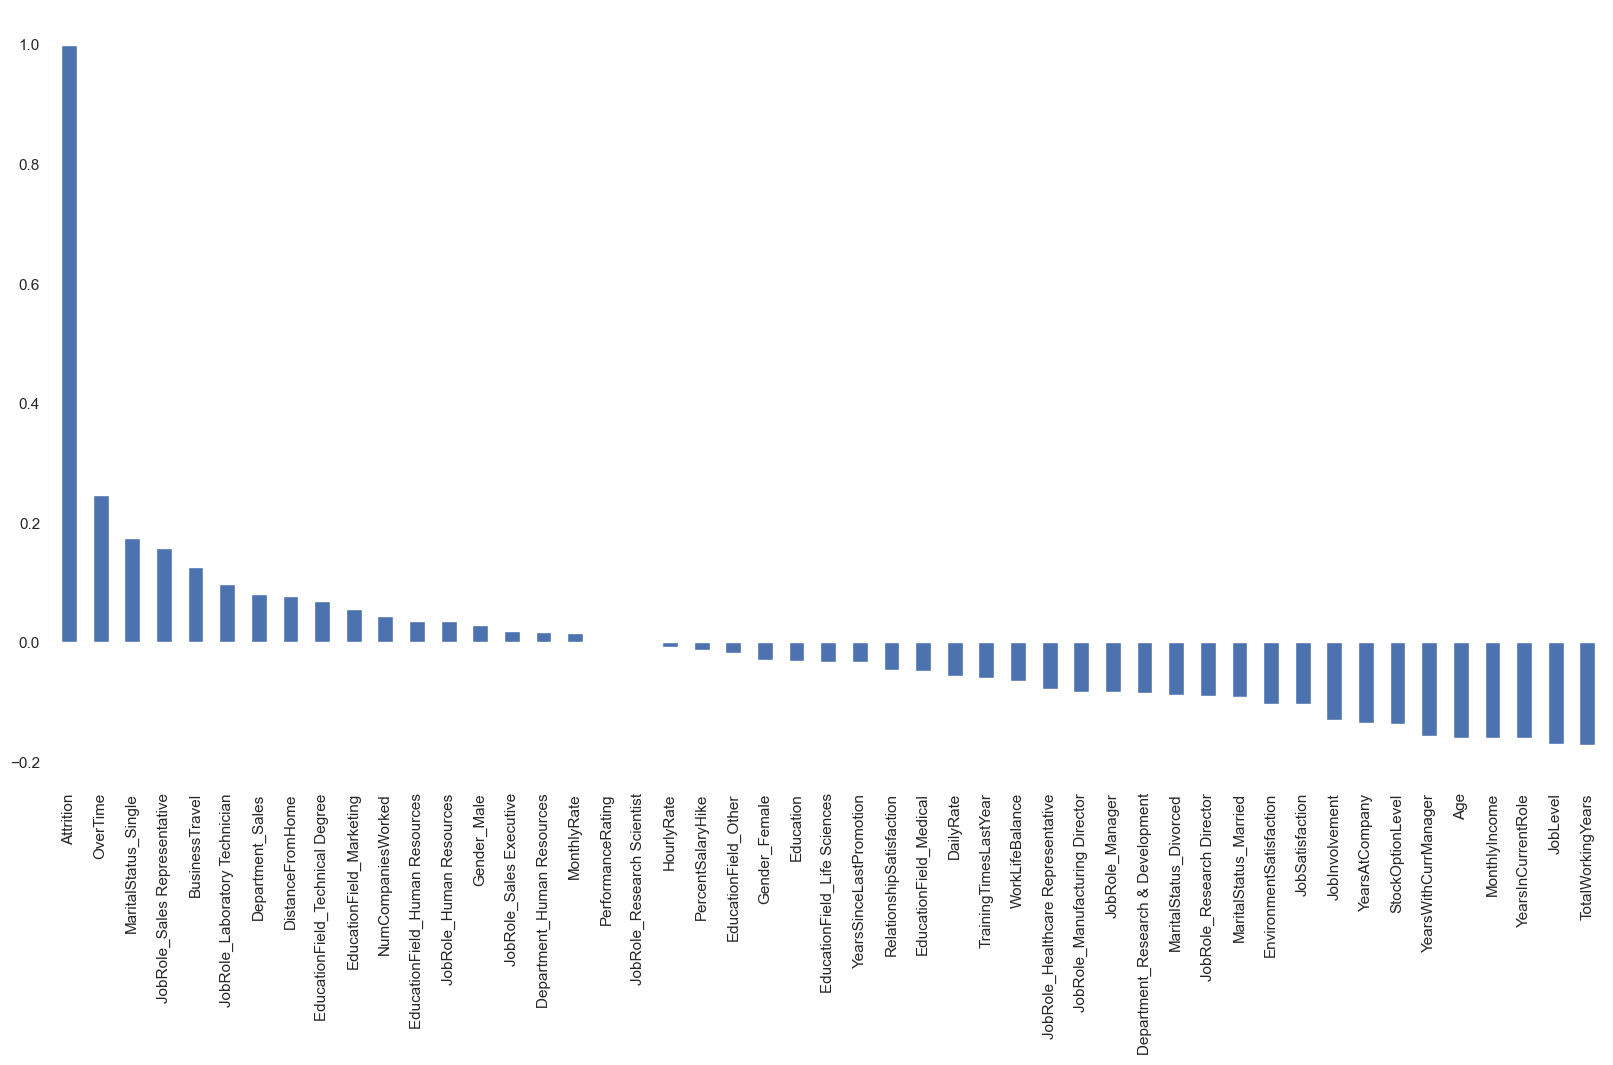

In [34]:
correlations=df.corr()
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [35]:
'''The higher the correlation between the two independent variables, the more similar information they bring to the context of the problem.
Therefore, when two independent variables have high correlation, one can be selected to apply to model training.
we will use code from cited notebook to check correlations between independent variables.'''

'The higher the correlation between the two independent variables, the more similar information they bring to the context of the problem.\nTherefore, when two independent variables have high correlation, one can be selected to apply to model training.\nwe will use code from cited notebook to check correlations between independent variables.'

In [36]:
threshold=0.7
cols = list(correlations.columns)
cols_at_index = list(correlations.index)
feature1, feature2, correlation = [], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j] >= threshold and correlations[cols[i]][j] < 1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])

new_df = pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,MonthlyIncome,TotalWorkingYears,0.772893
3,PercentSalaryHike,PerformanceRating,0.773550
4,YearsAtCompany,YearsInCurrentRole,0.758754
5,YearsAtCompany,YearsWithCurrManager,0.769212
6,YearsInCurrentRole,YearsWithCurrManager,0.714365
7,Department_Human Resources,JobRole_Human Resources,0.904983
8,Department_Sales,JobRole_Sales Executive,0.808869


In [37]:
 #let's drop some irrelevant data
df_copy = df.copy()

# dropping columns that are not correlated with the target
df_copy.drop(['MonthlyRate', 'PerformanceRating', 'JobRole_Research Scientist', 'HourlyRate', 'PercentSalaryHike', 'EducationField_Other'], axis=1, inplace=True)

# dropping YearsInCurrentRole and YearsWithCurrManager as they are strongly correlated with YearsAtCompany
df_copy.drop(['YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)

# dropping JobRole_Human Resources to leave Department_Human Resources
# and JobRole_Sales Executive to leave Department_Sales
df_copy.drop(['JobRole_Human Resources', 'JobRole_Sales Executive'], axis=1, inplace=True)

In [38]:
df_copy


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1.0,1.0,1102,1,2,2,3,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,49,0.0,2.0,279,8,1,3,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1.0,1.0,1373,2,2,4,2,1,3,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0.0,2.0,1392,3,4,4,3,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0.0,1.0,591,2,1,1,3,1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,2.0,884,23,2,3,4,2,4,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0.0,1.0,613,6,1,4,2,3,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0.0,1.0,155,4,3,2,4,2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1468,49,0.0,2.0,1023,2,3,4,2,2,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

In [40]:
'''As I mentioned earlier, the target data is imbalanced, giving us 16% of employees who left the company versus 84% who stayed. This by itself can create bias in our models and show high accuracy while majority of of the less represented class will be predicted wrongly.

One way of dealing with this issue is to either oversample or undersample the dataset. I will go with oversampling,
because even though we have lots of features,we have only 1470 samples, so enlarging that shouldn't make any problem.'''

"As I mentioned earlier, the target data is imbalanced, giving us 16% of employees who left the company versus 84% who stayed. This by itself can create bias in our models and show high accuracy while majority of of the less represented class will be predicted wrongly.\n\nOne way of dealing with this issue is to either oversample or undersample the dataset. I will go with oversampling,\nbecause even though we have lots of features,we have only 1470 samples, so enlarging that shouldn't make any problem."

In [41]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)


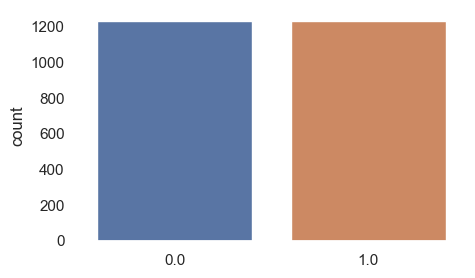

In [42]:
plt.subplots(figsize=(5,3))
sns.countplot(x=y);

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
train_data = pd.DataFrame(X_train)
train_data['Attrition'] = y_train

In [45]:
test_data = pd.DataFrame(X_test)
test_data['Attrition'] = y_test

In [46]:
train_data.to_csv('train_data.csv', index=False)

In [47]:
test_data.to_csv('test_data.csv', index=False)

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [49]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [50]:
logreg_pred = logreg.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy",accuracy)

Accuracy 0.8522267206477733


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'C':[0.01,0.1,1,10],'gamma':[1,0.01,0.001]}

In [54]:
svm = SVC()

In [55]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.01, gamma=1;, score=0.501 total time=   0.2s
[CV 2/5] END ...................C=0.01, gamma=1;, score=0.501 total time=   0.2s
[CV 3/5] END ...................C=0.01, gamma=1;, score=0.503 total time=   0.4s
[CV 4/5] END ...................C=0.01, gamma=1;, score=0.503 total time=   0.2s
[CV 5/5] END ...................C=0.01, gamma=1;, score=0.500 total time=   0.3s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.501 total time=   0.3s
[CV 2/5] END ................C=0.01, gamma=0.01;, score=0.501 total time=   0.3s
[CV 3/5] END ................C=0.01, gamma=0.01;, score=0.503 total time=   0.3s
[CV 4/5] END ................C=0.01, gamma=0.01;, score=0.503 total time=   0.3s
[CV 5/5] END ................C=0.01, gamma=0.01;, score=0.500 total time=   0.3s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.501 total time=   0.3s
[CV 2/5] END ...............C=0.01, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [1, 0.01, 0.001]},
             verbose=3)

In [57]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [58]:
final_svm = SVC(C=1, gamma=0.01)

In [59]:
final_svm.fit(X_train,y_train)

SVC(C=1, gamma=0.01)

In [60]:
svm_pred = final_svm.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy",accuracy)

Accuracy 0.6740890688259109


In [62]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model GaussianNB 71.1%


In [64]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model DecisionTreeClassifier 87.4%


In [65]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model ExtraTreeClassifier 81.6%


In [66]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [68]:
rf_predictions = rf.predict(X_test)
print("Predictions finished")

Predictions finished


In [69]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.9008097165991903
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       250
         1.0       0.94      0.86      0.90       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [70]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [71]:
support_vector_machine = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [72]:
voting_classifier = VotingClassifier(
    estimators=[
        ("svm", support_vector_machine),
        ("dt", decision_tree),
        ("rf", random_forest)
    ],
    voting="hard"  # You can also use "soft" voting
)


In [73]:
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [74]:
y_pred = voting_classifier.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)

Accuracy 0.9068825910931174


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt', GradientBoostingClassifier())
]

In [77]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)


In [78]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)
from imblearn.over_sampling import SMOTE

X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the base models
base_models = [
    ('model1', LogisticRegression()),
    ('model2', KNeighborsClassifier())
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
accuracy = stacking_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8137651821862348


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
logistic = LogisticRegression()
kneighbours = KNeighborsClassifier()

In [80]:
voting_classifier = VotingClassifier(
    estimators=[
        ("logreg", logistic),
        ("knn", kneighbours)
    ],
    voting="hard"  # You can also use "soft" voting
)


In [81]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])

In [82]:
y_pred = voting_classifier.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)

Accuracy 0.7611336032388664


In [84]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assume 'df_copy' is your dataframe containing the data
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

# Apply SMOTE to balance the classes (if needed)
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
accuracy = stacking_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9352226720647774


In [85]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [86]:
model_rfe = LogisticRegression()  # You can use any classifier of your choice here
rfe = RFE(model_rfe, n_features_to_select=11)  # Select the number of features you want to keep
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
X_train_rfe
X_test_rfe

array([[1.        , 3.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 3.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 3.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 4.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.92209388, 3.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 3.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
k_best = SelectKBest(score_func=f_classif, k=11)  # Select the number of features you want to keep
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

In [88]:
X_train_df = pd.DataFrame(X_train)
print("Selected features from RFE:")
print(X_train_df.columns[rfe.support_])
print("\nSelected features from SelectKBest:")
print(X_train_df.columns[k_best.get_support()])


Selected features from RFE:
Index([1, 6, 11, 13, 16, 22, 29, 30, 31, 33, 34], dtype='int64')

Selected features from SelectKBest:
Index([0, 5, 6, 7, 8, 9, 11, 13, 14, 16, 17], dtype='int64')


In [89]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assume 'df_copy' is your dataframe containing the data
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

# Apply SMOTE to balance the classes (if needed)
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
accuracy = stacking_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9271255060728745


In [90]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# Load data from CSV
data = pd.read_csv("C:\\Users\\Jigya Taneja\\Documents\\Sem 6\\Capstone Project\\Phase 2\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Separate target variable and features
y = data['Attrition']
X = data.drop(['Attrition'], axis=1)

# Convert 'Attrition' to binary labels (1 for 'Yes', 0 for 'No')
y = y.replace({'Yes': 1, 'No': 0})

# Convert categorical variables using one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination (RFE)
model_rfe = LogisticRegression()  # You can use any classifier of your choice here
rfe = RFE(model_rfe, n_features_to_select=11)  # Select the number of features you want to keep
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Perform SelectKBest feature selection
k_best = SelectKBest(score_func=f_classif, k=11)  # Select the number of features you want to keep
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Print the selected features for RFE and SelectKBest
print("Selected features from RFE:")
print(X_train.columns[rfe.support_])
print("\nSelected features from SelectKBest:")
print(X_train.columns[k_best.get_support()])

# Now you can use X_train_rfe, X_test_rfe, X_train_kbest, X_test_kbest for modeling
# and evaluation with the selected features.


Selected features from RFE:
Index(['JobInvolvement', 'BusinessTravel_Travel_Frequently',
       'Department_Research & Development', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Representative', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

Selected features from SelectKBest:
Index(['Age', 'JobLevel', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'JobRole_Sales Representative',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


In [91]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Assume 'df_copy' is your dataframe containing the data
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

# Apply SMOTE to balance the classes (if needed)
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, Y_train)

# Evaluate the stacking model
accuracy = stacking_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9311740890688259


In [92]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assume 'df_copy' is your dataframe containing the data
y = df_copy['Attrition'].values
X = df_copy.drop(['Attrition'], axis=1)

# Apply SMOTE to balance the classes (if needed)
X, y = SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)
X = np.asarray(X)
y = np.asarray(y)
X_train_rfe, X_test_rfe,Y_train_rfe,Y_test_rfe = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

voting_classifier = VotingClassifier(
    estimators=base_models,
    voting="hard"  # You can also use "soft" voting
)
voting_classifier.fit(X_train, Y_train_rfe)
y_pred = voting_classifier.predict(X_test_rfe)
accuracy = accuracy_score(Y_test_rfe, y_pred)
print("Accuracy",accuracy)

Accuracy 0.8582995951417004


In [93]:
import pandas as pd
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load data from CSV
data = pd.read_csv("C:\\Users\\Jigya Taneja\\Documents\\Sem 6\\Capstone Project\\Phase 2\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Separate target variable and features
y = data['Attrition']
X = data.drop(['Attrition'], axis=1)

# Convert 'Attrition' to binary labels (1 for 'Yes', 0 for 'No')
y = y.replace({'Yes': 1, 'No': 0})

# Convert categorical variables using one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination (RFE)
model_rfe = DecisionTreeClassifier()  # You can use any classifier of your choice here
rfe = RFE(model_rfe, n_features_to_select=11)  # Select the number of features you want to keep
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Perform SelectKBest feature selection
k_best = SelectKBest(score_func=f_classif, k=11)  # Select the number of features you want to keep
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Define the base models
base_models = [
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier for RFE-selected features
stacking_model_rfe = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create the stacking classifier for SelectKBest-selected features
stacking_model_kbest = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking models
stacking_model_rfe.fit(X_train_rfe, y_train)
stacking_model_kbest.fit(X_train_kbest, y_train)

# Evaluate the stacking models
accuracy_rfe = stacking_model_rfe.score(X_test_rfe, y_test)
accuracy_kbest = stacking_model_kbest.score(X_test_kbest, y_test)

print("Accuracy with RFE-selected features:", accuracy_rfe)
print("Accuracy with SelectKBest-selected features:", accuracy_kbest)

Accuracy with RFE-selected features: 0.8639455782312925
Accuracy with SelectKBest-selected features: 0.8469387755102041


In [94]:
import numpy as np

# Concatenate the transformed feature sets along with the original features
X_train_combined = np.hstack((X_train_rfe, X_train_kbest, X_train))
X_test_combined = np.hstack((X_test_rfe, X_test_kbest, X_test))

# Create the stacking classifier using the combined feature set
stacking_model_combined = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model using the combined feature set
stacking_model_combined.fit(X_train_combined, y_train)

# Evaluate the stacking model with the combined feature set
accuracy_combined = stacking_model_combined.score(X_test_combined, y_test)

print("Accuracy with combined features (RFE and SelectKBest):", accuracy_combined)

Accuracy with combined features (RFE and SelectKBest): 0.8605442176870748


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load data from CSV
data = pd.read_csv("C:\\Users\\Jigya Taneja\\Documents\\Sem 6\\Capstone Project\\Phase 2\\WA_Fn-UseC_-HR-Employee-Attrition.csv")


# Separate target variable and features
y = data['Attrition']
X = data.drop(['Attrition'], axis=1)

# Convert 'Attrition' to binary labels (1 for 'Yes', 0 for 'No')
y = y.replace({'Yes': 1, 'No': 0})

# Convert categorical variables using one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination (RFE)
model_rfe = LogisticRegression()  # You can use any classifier of your choice here
rfe = RFE(model_rfe, n_features_to_select=3)  # Select the number of features you want to keep
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Perform SelectKBest feature selection
k_best = SelectKBest(score_func=f_classif, k=3)  # Select the number of features you want to keep
X_train_kbest = k_best.fit_transform(X_train, y_train)
X_test_kbest = k_best.transform(X_test)

# Convert labels to one-hot encoding for deep learning model
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Define the deep learning model for feature selection
def create_feature_selection_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the base models for stacking
base_models = [
    ('knn', KNeighborsClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC()),
    ('decision_tree', DecisionTreeClassifier())
]

# Create the stacking classifier for RFE-selected features using deep learning model
feature_selection_model_rfe = create_feature_selection_model(X_train_rfe.shape[1], 2)
feature_selection_model_rfe.fit(X_train_rfe, y_train_onehot, epochs=50, batch_size=32)

# Create the stacking classifier for SelectKBest-selected features using deep learning model
feature_selection_model_kbest = create_feature_selection_model(X_train_kbest.shape[1], 2)
feature_selection_model_kbest.fit(X_train_kbest, y_train_onehot, epochs=50, batch_size=32)

# Get the predictions from the deep learning models for feature selection
X_train_rfe_selected = feature_selection_model_rfe.predict(X_train_rfe)
X_test_rfe_selected = feature_selection_model_rfe.predict(X_test_rfe)

X_train_kbest_selected = feature_selection_model_kbest.predict(X_train_kbest)
X_test_kbest_selected = feature_selection_model_kbest.predict(X_test_kbest)

# Concatenate the transformed feature sets along with the original features
X_train_combined = np.hstack((X_train_rfe_selected, X_train_kbest_selected, X_train))
X_test_combined = np.hstack((X_test_rfe_selected, X_test_kbest_selected, X_test))

# Define the meta model for stacking
meta_model = LogisticRegression()

# Create the stacking classifier using the combined feature set
stacking_model_combined = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model using the combined feature set
stacking_model_combined.fit(X_train_combined, y_train)

# Evaluate the stacking model with the combined feature set
accuracy_combined = stacking_model_combined.score(X_test_combined, y_test)

print("Accuracy with combined features (RFE and SelectKBest) using deep learning models:", accuracy_combined)

Epoch 1/50
37/37 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.8316
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8316
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8316
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8401
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8350
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8333
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8325
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8384
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8367
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8435
Epoch 11/50
37/37 [

In [96]:
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [98]:
y_pred_poly = svc_poly.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy",accuracy)

Accuracy 0.8673469387755102


In [103]:
svc_gaussian = SVC(kernel='rbf', degree=8)
svc_gaussian.fit(X_train, y_train)

SVC(degree=8)

In [104]:
y_pred_gaussian = svc_gaussian.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred_gaussian)
print("Accuracy",accuracy)

Accuracy 0.8673469387755102
